"Shape Detection with Hough Transform on Image: A Python Notebook"

This notebook demonstrates the application of Hough Transform to detect shapes in an image. To enhance shape identification, an edge detection filter is applied first. The step-by-step process involves edge detection, followed by the Hough Transform. The notebook serves as a practical guide for implementing shape detection algorithms using Python.

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


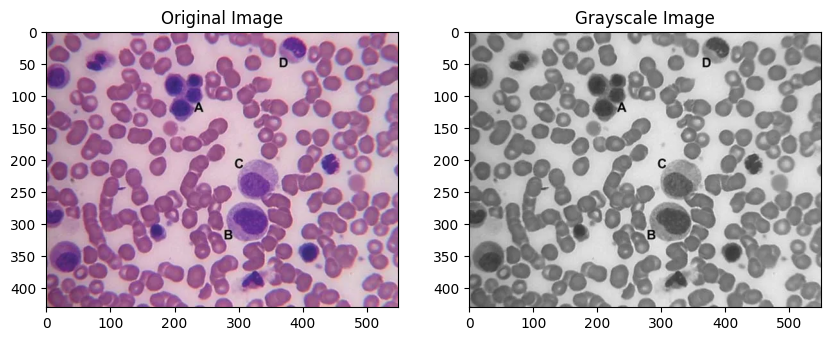

In [20]:
# Load the image
image = cv2.imread('/content/Bone-marrow.webp')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()


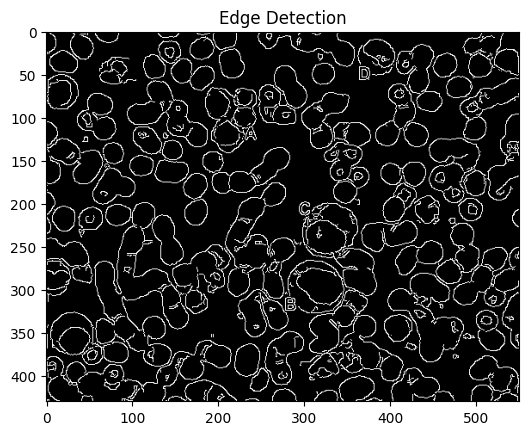

In [21]:
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()


 Hough Transform is employed to identify geometric shapes, such as lines or circles, in the image. The Hough Transform represents these shapes in a parameter space, allowing for the extraction of shape-related information. In the case of line detection, the Hough Line Transform identifies lines by mapping points in the edge-detected image to lines in parameter space.

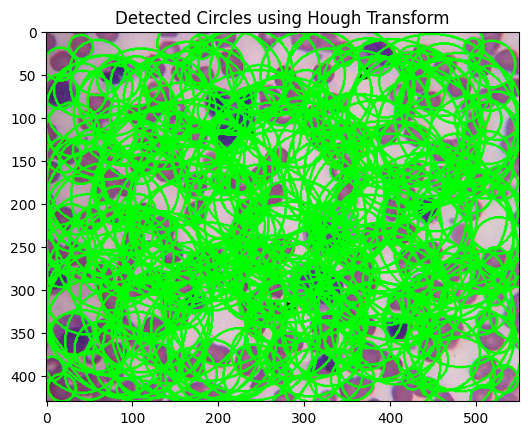

In [22]:
# Apply Hough Circle Transform to detect circles
circles = cv2.HoughCircles(
    gray_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
    param1=50, param2=30, minRadius=5, maxRadius=100)

# Draw detected circles on a copy of the original image
circles_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(circles_image, center, radius, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles using Hough Transform')
plt.show()
